## Import packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
import numpy as np
df=pd.read_csv('train.csv')

# Part 1
## Find predictors of influence
### Try different machine learning algorithms to choose the one that yields the highest accuracy score

#### Data set description:
Each observation describes two individuals, A and B. There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network characteristics, etc. Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”).

Perhaps a transformation of (A / B) or (A – B) variables will be better than using A 
and B variables separately. This may also be easier to interpret.

### 1. classification model with no column manipulation (i.e. no column interactions)

In [2]:
y = df['Choice']
X = df.drop(columns = 'Choice')
y.value_counts() #it is balanced, we don't need to do anything on it

1    2802
0    2698
Name: Choice, dtype: int64

In [70]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Feature Selection

In [71]:
#lasso
lasso = Lasso(alpha = 0.01)
model_lasso = lasso.fit(X_std, y)
model_lasso.coef_
# store into dataframe
lasso_df = pd.DataFrame(list(zip(X.columns, model_lasso.coef_)), columns = ['predictor','coefficient'])
# convert to boolean, working as index for calling
lasso_choose = []
for i in lasso_df.index:
    if lasso_df["coefficient"][i] != 0:
        lasso_choose.append(True)
    else:
        lasso_choose.append(False)

In [72]:
#random Forest
randomforest = RandomForestClassifier(random_state = 42)
model_rf = randomforest.fit(X, y)
model_rf.feature_importances_ # the higher the score, the more important it is

# store into dataframe
rf_df = pd.DataFrame(list(zip(X.columns, model_rf.feature_importances_)), columns = ['predictor','feature importance'])
# select those who pass the threshold, the common threshold is 0.05
tf_list = []
for i in rf_df.index:
    if rf_df["feature importance"][i] >= 0.05:
        tf_list.append(True)
    else:
        tf_list.append(False)

In [73]:
#gradient boosting
gbt = GradientBoostingClassifier()
model_gbt = gbt.fit(X,y)
model_gbt.feature_importances_
threshold = 0.05

# store into dataframe
gbt_df = pd.DataFrame(list(zip(X.columns, model_gbt.feature_importances_)), columns = ['predictor','feature importance'])
# select those who pass the threshold, the common threshold is 0.05
gbt_list = []
for i in gbt_df.index:
    if gbt_df["feature importance"][i] >= 0.05:
        gbt_list.append(True)
    else:
        gbt_list.append(False)

### build classification models

In [ ]:
########build classification models###############
accuracy_list = []
#####using lasso selected features#########
_lasso = X.iloc[:, lasso_choose]
_lasso_std = scaler.fit_transform(_lasso)
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(_lasso_std, y, test_size = 0.2, random_state = 5)
lr = LogisticRegression(max_iter = 10000)
model_lr_lasso_selected = lr.fit(X_train, y_train)

y_test_pred = model_lr_lasso_selected.predict(X_test)

print("Logistic Regression Model (Lasso):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)
acc_lr_lasso = ('lr_lasso', acc)
accuracy_list.append(acc_lr_lasso)


#xgb
X_train, X_test, y_train, y_test = train_test_split(_lasso, y, test_size = 0.2, random_state = 5)
xgb = XGBClassifier()
model_xgb_lasso_selected = xgb.fit(X_train, y_train)
y_test_pred = model_xgb_lasso_selected.predict(X_test)

print("XGB (Lasso):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)

acc_xgb_lasso = ('xgb_lasso', acc)
accuracy_list.append(acc_xgb_lasso)


#####using random forest selected features#########
_rf = X.iloc[:, tf_list]
_rf_std = scaler.fit_transform(_rf)
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(_rf_std, y, test_size = 0.3, random_state = 42)

model_lr_rf_selected = lr.fit(X_train, y_train)
y_test_pred = model_lr_rf_selected.predict(X_test)
print("Logistic Regression Model (random forest):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)
acc_lr_rf = ('lr_rf', acc)
accuracy_list.append(acc_lr_rf)

#xgb
X_train, X_test, y_train, y_test = train_test_split(_rf, y, test_size = 0.2, random_state = 5)
xgb = XGBClassifier()
model_xgb_rf_selected = xgb.fit(X_train, y_train)
y_test_pred = model_xgb_rf_selected.predict(X_test)
print("XGB (random forest):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)

acc_xgb_rf = ('xgb_rf', acc)
accuracy_list.append(acc_xgb_rf)

#####using GBT selected features#########
_gbt = X.iloc[:, gbt_list]
_gbt_std = scaler.fit_transform(_gbt)
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(_gbt_std, y, test_size = 0.2, random_state = 5)
model_lr_gbt_selected = lr.fit(X_train, y_train)
y_test_pred = model_lr_gbt_selected.predict(X_test)
print("Logistic Regression Model (GBT):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)
acc_lr_gbt = ('lr_gbt', acc)
accuracy_list.append(acc_lr_gbt)

#XGB
X_train, X_test, y_train, y_test = train_test_split(_gbt, y, test_size = 0.2,random_state = 5)
xgb = XGBClassifier()
model_xgb_gbt_selected = xgb.fit(X_train, y_train)
y_test_pred = model_xgb_gbt_selected.predict(X_test)
print("XGB (GBT):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)

acc_xgb_gbt = ('xgb_gbt', acc)
accuracy_list.append(acc_xgb_gbt)


### 2. classification model with columns A-B

In [74]:
df=pd.read_csv('train.csv')
Adf = df.iloc[:, 1:12].values
Bdf = df.iloc[:, 12:].values
new_df = Adf - Bdf
new_df = pd.DataFrame({'A-B_follower_count': new_df[:, 0], 'A-B_following_count': new_df[:, 1],
                       'A-B_listed_count': new_df[:,2], 'A-B_mentions_received': new_df[:,3],
                       'A-B_retweets_received': new_df[:,4], 'A-B_mentions_sent': new_df[:,5],
                       'A-B_retweets_sent': new_df[:,6], 'A-B_posts': new_df[:,7],
                       'A-B_network_feature_1': new_df[:,8], 'A-B_network_feature_2': new_df[:,9],
                       'A-B_network_feature_3': new_df[:,10]})
new_df['Choice'] = df['Choice']

In [75]:
y = new_df['Choice']
X = new_df.drop(columns = 'Choice')

In [76]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Classification model with no feature selection

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
##Random forest
randomforest = RandomForestClassifier()
model = randomforest.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print("Random forest:")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)


##logistic regression
lr1 = LogisticRegression(max_iter=1000)
model2 = lr1.fit(X_train,y_train)
y_test_pred = model2.predict(X_test)
accuracy_score(y_test, y_test_pred)

print("logistic regression:")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)


#GBT
gbt = GradientBoostingClassifier(random_state=5,min_samples_split = 8, n_estimators = 100)
model3 = gbt.fit(X_train,y_train)
y_test_pred = model3.predict(X_test)
accuracy_score(y_test, y_test_pred)

print("GBT:")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)

Random forest:
Classification Accuracy: 0.79
Precision 0.7787307032590052
Recall: 0.8165467625899281
logistic regression:
Classification Accuracy: 0.7572727272727273
Precision 0.7584973166368515
Recall: 0.762589928057554
GBT:
Classification Accuracy: 0.8
Precision 0.788659793814433
Recall: 0.8255395683453237


### Feature Selection

In [78]:
#lasso
lasso = Lasso(alpha = 0.01)
model_lasso = lasso.fit(X_std, y)
model_lasso.coef_
# store into dataframe
lasso_df = pd.DataFrame(list(zip(X.columns, model_lasso.coef_)), columns = ['predictor','coefficient'])
# convert to boolean, working as index for calling
lasso_choose = []
for i in lasso_df.index:
    if lasso_df["coefficient"][i] != 0:
        lasso_choose.append(True)
    else:
        lasso_choose.append(False)

In [79]:
#random Forest
randomforest = RandomForestClassifier(random_state = 42)
model_rf = randomforest.fit(X, y)
model_rf.feature_importances_ # the higher the score, the more important it is

# store into dataframe
rf_df = pd.DataFrame(list(zip(X.columns, model_rf.feature_importances_)), columns = ['predictor','feature importance'])
# select those who pass the threshold, the common threshold is 0.05
tf_list = []
for i in rf_df.index:
    if rf_df["feature importance"][i] >= 0.05:
        tf_list.append(True)
    else:
        tf_list.append(False)

### build classification models

In [80]:
########build classification models###############
accuracy_list = []
#####using lasso selected features#########
_lasso = X.iloc[:, lasso_choose]
_lasso_std = scaler.fit_transform(_lasso)
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(_lasso_std, y, test_size = 0.2, random_state = 5)
lr = LogisticRegression(max_iter = 10000)
model_lr_lasso_selected = lr.fit(X_train, y_train)
y_test_pred = model_lr_lasso_selected.predict(X_test)
print("Logistic Regression Model (Lasso selected):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)
acc_lr_lasso = ('lr_lasso', acc)
accuracy_list.append(acc_lr_lasso)


##Random forest
randomforest = RandomForestClassifier()
model2 = randomforest.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)
accuracy_score(y_test, y_test_pred)
print("Random Forest Model (Lasso selected):")
acc2 = accuracy_score(y_test, y_test_pred)
print("Classification Accuracy:", acc2)
pre2 = metrics.precision_score(y_test, y_test_pred)
recall2 = metrics.recall_score(y_test, y_test_pred)
print("Precision", pre2)
print("Recall:", recall2)

Logistic Regression Model (Lasso selected):
Classification Accuracy: 0.7445454545454545
Precision 0.7342419080068143
Recall: 0.7751798561151079
Random Forest Model (Lasso selected):
Classification Accuracy: 0.7836363636363637
Precision 0.7750865051903114
Recall: 0.8057553956834532


In [81]:
#####using random forest selected features#########
_rf = X.iloc[:, tf_list]
_rf_std = scaler.fit_transform(_rf)
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(_rf_std, y, test_size = 0.3, random_state = 42)
model_lr_rf_selected = lr.fit(X_train, y_train)
y_test_pred = model_lr_rf_selected.predict(X_test)
print("Logistic Regression Model (random forest selected):")
acc = accuracy_score(y_test, y_test_pred)
pre = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
print("Classification Accuracy:", acc)
print("Precision", pre)
print("Recall:", recall)
acc_lr_rf = ('lr_rf', acc)
accuracy_list.append(acc_lr_rf)

##Random forest
randomforest = RandomForestClassifier()
model2 = randomforest.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)
accuracy_score(y_test, y_test_pred)
print("Random Forest Model (random forest selected):")
acc2 = accuracy_score(y_test, y_test_pred)
print("Classification Accuracy:", acc2)
pre2 = metrics.precision_score(y_test, y_test_pred)
recall2 = metrics.recall_score(y_test, y_test_pred)
print("Precision", pre2)
print("Recall:", recall2)

Logistic Regression Model (random forest selected):
Classification Accuracy: 0.74
Precision 0.7265536723163842
Recall: 0.7746987951807229
Random Forest Model (random forest selected):
Classification Accuracy: 0.7745454545454545
Precision 0.7700471698113207
Recall: 0.7867469879518072


### 3. classification model with columns A/B¶

In [82]:
y = df.iloc[:,0]
df_a = df.iloc[:,1:12].values
df_b = df.iloc[:,12:].values

## change zero values
for i in range(len(df_a)):
    for j in range(len(df_a[i])):
        if df_a[i][j] == 0 :
            df_a[i][j] = 0.000001
        if df_b[i][j] == 0 :
            df_b[i][j] = 0.000001

In [83]:
## division
X = df_a/df_b

In [84]:
feature =["follower","following","listed","mentions_received","retweets_received","mentions_sent","retweet_received",
          "posts","network_feature_1","network_feature_2","network_feature_3"]
X = pd.DataFrame(X,columns = feature)

### Correlation

In [85]:
## find collinear terms

df_all = pd.concat([X,y], axis=1)

correlation = df_all.corr()
correlation_var = []
for j in range(0,len(correlation)-1):
    i=j+1
    while i < len(correlation):
        if abs(correlation.iloc[i,j]) >= 0.7:
            correlation_var.append([correlation.index[i],correlation.columns[j],correlation.iloc[i,j]])
        i = i+1


In [86]:
correlation_var

[['retweets_received', 'mentions_received', 0.7863380042405462],
 ['network_feature_1', 'mentions_received', 0.8917248110430861]]

In [87]:
X = X.drop(columns = ["mentions_received"])

### RF feature selection

In [88]:
## need to perform feature selection on predictors
## Random Forest
randomforest = RandomForestClassifier(random_state = 0)

model = randomforest.fit(X,y)
model.feature_importances_
feature_result = pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','feature_importance'])

## set the threshold of random forest feature selection result to be 0.01
## obtained the list of predictorss
var_list = []
for i in range(len(feature_result.predictor)):
    if feature_result.loc[i,'feature_importance'] >= 0.1:
        var_list.append(feature_result.predictor.loc[i])

X_rf = X[var_list]

In [89]:
X_rf

,follower,listed,retweets_received,network_feature_1
0,0.006616,0.001776,0.025227,0.030303
1,0.549921,0.141615,2.884551,2.263804
2,2.018222,0.490291,26.966469,31.666667
3,0.001022,0.007194,0.000711,0.003405
4,6.035081,14.591160,10.330091,6.482353
...,...,...,...,...
5495,0.051921,0.089546,0.056418,0.138033
5496,0.141058,0.625000,0.328364,5.000000
5497,2.036669,4.127072,6.232288,2.376471
5498,0.822042,0.024784,10.811390,3.739943


In [90]:
## train test split
X_train,X_test,y_train,y_test = train_test_split(X_rf,y,test_size=0.2,random_state = 5)

### build classification models

In [91]:
## Logistic Regression

lr = LogisticRegression(max_iter=2000) 
model1 = lr.fit(X_train,y_train)
y_test_pred = model1.predict(X_test)
ls_score = metrics.accuracy_score(y_test, y_test_pred)
ls_score

0.5227272727272727

In [92]:
## RANDOM FOREST

randomforest = RandomForestClassifier(random_state=5)

model2 = randomforest.fit(X_train,y_train) 
y_test_pred = model2.predict(X_test)
rf_score = metrics.accuracy_score(y_test,y_test_pred)
rf_score

0.7745454545454545

In [93]:
## GRADIENT BOOST

## uncomment the following lines to see how to find the optimal min_samples_split value
for i in range(1,10):
    model = GradientBoostingClassifier(random_state=0,min_samples_split = i*2, n_estimators = 100)
    scores = cross_val_score(estimator = model, X=X_train, y=y_train, cv=5)
    print(i*2,':',np.average(scores))
## i =8


2 : 0.7575000000000001
4 : 0.7563636363636363
6 : 0.7595454545454545
8 : 0.7563636363636362
10 : 0.7545454545454545
12 : 0.7549999999999999
14 : 0.7561363636363637
16 : 0.7565909090909091
18 : 0.7543181818181818


In [94]:
gbt = GradientBoostingClassifier(random_state=0,min_samples_split = 6, n_estimators = 100)
model3 = gbt.fit(X_train,y_train)
y_test_pred = model3.predict(X_test)
gbt_score = metrics.accuracy_score(y_test,y_test_pred)

gbt_score

0.7972727272727272

## choose the one that yields the highest accuracy score
From the accuracy of all the models above, we have the highest accuracy in the GBT Model for paired columns by doing A-B, without further feature selection. And the accuracy of this model is 0.8


## Task: To find out the best predictor in this GBT model

In [11]:
y = new_df['Choice']
X = new_df.drop(columns = 'Choice')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
gbt = GradientBoostingClassifier(random_state=5,min_samples_split = 8, n_estimators = 100)
model3 = gbt.fit(X_train,y_train)
y_test_pred = model3.predict(X_test)
accuracy_score(y_test, y_test_pred)


0.8

In [96]:
import matplotlib.pyplot as pyplot

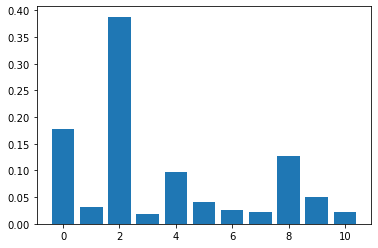

In [97]:
# plot
pyplot.bar(range(len(model3.feature_importances_)), model3.feature_importances_)
pyplot.show()

In [98]:
important_features = X.columns.values.tolist()
print('Three best predictors in this model:', important_features[2], ',', important_features[0],
     ',', important_features[8], ',', important_features[4])

Three best predictors in this model: A-B_listed_count , A-B_follower_count , A-B_network_feature_1 , A-B_retweets_received


### Four best predictors in this model: 
A-B_listed_count , A-B_follower_count , A-B_network_feature_1 and A-B_retweets_received. 

This is kind of suprising because we thought the difference in the number of mentions received should also be of top importance, but it's not in the most important four predictors.

This model can be used to predict the power of influence of user on social media (eg.  Twitter). Business can use the difference in the number of listed, number of followers, degrees centrality and the number of retweets received to determine which user is more influential.

In [99]:
##print the feature importance of the top four importance predictors
print(model3.feature_importances_[2], ',', model3.feature_importances_[0],
     ',', model3.feature_importances_[8], ',', model3.feature_importances_[4])

0.3879603043778103 , 0.1766648317226786 , 0.12718548362682655 , 0.0962322414260105


## Task: Financial Value Calculation

#### Assumption:
A retailer wants influencers to tweet its promotion for a product. If a non-influencer 
tweets, there is no benefit to the retailer. If an influencer tweets once, there is a 0.02%
chance that his/her followers will buy one unit of a product. Assume the retailer has a 
profit margin of 10 per unit, and that one customer can buy only one unit. If an 
influencer tweets twice, the overall buying probability will be 0.03%. Without analytics, 
the retailer offers 5 to each person (A and B) to tweet once. With analytics, the retailer 
offers 10 to those identified as influencers by the model to send two tweets each. If 
the model classifies an individual as a non-influencer, s/he is not selected/paid by the 
retailer to tweet.

In [5]:
df = pd.read_csv('train.csv')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
df=pd.read_csv('train.csv')
Adf = df.iloc[:, 1:12].values
Bdf = df.iloc[:, 12:].values
new_df = Adf - Bdf
new_df = pd.DataFrame({'A-B_follower_count': new_df[:, 0], 'A-B_following_count': new_df[:, 1],
                       'A-B_listed_count': new_df[:,2], 'A-B_mentions_received': new_df[:,3],
                       'A-B_retweets_received': new_df[:,4], 'A-B_mentions_sent': new_df[:,5],
                       'A-B_retweets_sent': new_df[:,6], 'A-B_posts': new_df[:,7],
                       'A-B_netwbork_feature_1': new_df[:,8], 'A-B_network_feature_2': new_df[:,9],
                       'A-B_network_feature_3': new_df[:,10]})
new_df['Choice'] = df['Choice']
y = new_df['Choice']
X = new_df.drop(columns = 'Choice')
gbt = GradientBoostingClassifier(random_state=5,min_samples_split = 8, n_estimators = 100)
model3 = gbt.fit(X_train,y_train)
y_test_pred = model3.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8

### To find out  the boost in expected net profit from using our analytic model (versus not using analytics)

### To find out the boost in net profit from using a perfect analytic model (versus not using analytics)

In [6]:
df=pd.read_csv('train.csv')
df = df[['A_follower_count','B_follower_count']]
df['influencer_pre'] = model3.predict(X)
df['influencer_pre'] = np.where(df['influencer_pre']==1, 'A', 'B')
EXRevenue_model = 0
for i in range(len(df)):
    if df.iloc[i,2] == 'B':
        EXRevenue_model += df.iloc[i, 1]*(0.03/100)*10
    if df.iloc[i,2] == 'A':
        EXRevenue_model += df.iloc[i, 0]*(0.03/100)*10
EXprofit_model = EXRevenue_model - len(df)*10
EXprofit_model

EXRevenue_nomodel = 0
for i in range(len(df)):
    EXRevenue_nomodel += 0.5*df.iloc[i, 1]*(0.02/100)*10 + 0.5*df.iloc[i, 0]*(0.02/100)*10
EXprofit_nomodel = EXRevenue_nomodel - len(df)*10

EXprofit_nomodel

print('boost in expected net profit from using an analytic model is', EXprofit_model-EXprofit_nomodel)


boost in expected net profit from using an analytic model is 10713424.716000035


In [7]:
(EXprofit_model-EXprofit_nomodel)/EXprofit_nomodel

1.4696984322244175

In [8]:
##boost in net profit from using a perfect analytic model
import numpy as np
df = pd.read_csv('train.csv')
df['influencer'] = np.where(df['Choice']==1, 'A', 'B')
df = df[['influencer','A_follower_count','B_follower_count']]
df

Revenue_model = 0
for i in range(len(df)):
    if df.iloc[i,0] == 'B':
        Revenue_model += df.iloc[i, 2]*(0.03/100)*10
    if df.iloc[i,0] == 'A':
        Revenue_model += df.iloc[i, 1]*(0.03/100)*10
profit_model = Revenue_model - len(df)*10
profit_model

Revenue_nomodel = 0
for i in range(len(df)):
    Revenue_nomodel += 0.5*df.iloc[i, 1]*(0.02/100)*10 + 0.5*df.iloc[i, 2]*(0.02/100)*10
profit_nomodel = Revenue_nomodel - len(df)*10

profit_nomodel

print('boost in net profit from using a perfect analytic model is', profit_model-profit_nomodel)


boost in net profit from using a perfect analytic model is 8785166.318999972


In [9]:
(profit_model-profit_nomodel)/profit_nomodel


1.205174396435734

### Financial value calculation results:
boost in expected net profit from using an analytic model is 10713424.716000035

boost in net profit from using a perfect analytic model is 8785166.318999972

The boost in the expected net profit is higher compared with the net profit from using a perfect analytic model, this might because the prediction model tends to rely more on the number of followers. 

# Part 2
## Task: Find influencers from Twitter

Collect about 5,000 tweets about Tesla. 
Write a script that parses through the tweets and does the following for each tweet:

Any retweet, mention or reply should result in an edge from the person retweeting to 
the person retweeted, mentioned or replied to. Save it into a 3-column csv file.

Use NodeXL to draw networks

Calculate the degree, betweenness and closeness of each node in the above network.

Using the results from Part I, create a list of top 100 influencers from the tweets.

### Webscriping

In [ ]:
# This code shows how to scrape twitter by using the snscrape python API
# Please make sure the snscrape has been installed in the local environment
# The snscape package can be installed by: pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
# The Python version has to be greater than 3.8
# An alternative Python method is to to execute CLI commands in Python. 
# Please check this link for more details: https://colab.research.google.com/drive/1ugr1biGxV9C2OwzS3HEh3KM0z2Xg44jb?usp=sharing

import snscrape.modules.twitter as sntwitter
import pandas as pd

key_word = "Tesla"  # Declare the key word used to search tweets
#user_name = "@elonmusk"   # Declare a user name used to search tweets
from_date = "2021-01-01" # Declare a start date
end_date = '2022-02-01'  # Declare a end date
count = 5000             # The maximum number of tweets
tweets_list_keyword = [] # A list used to store the returned results for keyword search
tweets_list_user = []    # A list used to store the retuned results for user search


#### Scraping tweets from a text search query ####
command_keyword = key_word+' since:'+from_date+' until:'+end_date # Define a string command for Scraper Api
print("Scraping data for keyword:",key_word)
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(command_keyword).get_items()):
    tweets_list_keyword.append([tweet.id, tweet.content, tweet.user.username, tweet.user.followersCount,tweet.user.listedCount,tweet.retweetedTweet]) # Append returned results to list
    if i>count:
        break;
#Create a dataframe from the tweets list above 
tweets_df_keyword = pd.DataFrame(tweets_list_keyword, columns=['Tweet Id', 'Text', 'Username', 'followers','listedcount','retweeted'])
tweets_df_keyword.to_csv("tweets_keywords.csv",index=False) # Export to a csv file
print("Scraped data have been exported to the csv file")


In [32]:
tweet = pd.read_csv("tweets_keywords.csv")
tweet.head(5)

,Tweet Id,Text,Username,followers,listedcount,retweeted
0,1488301057650438144,oh yeah tesla well what about a car that just ...,christrebecca,805,13,0
1,1488301049895079938,@parzr1 @fungineer43 @hikingskiing @elonmusk I...,CarlisleDB,193,2,0
2,1488301028592214018,"+$19,657 #QQQ #Tesla #spy https://t.co/q8Qm017Ik7",Picstocktrading,24,0,0
3,1488301021382205445,nuevo - Tesla añadirá un micrófono para karaok...,bettyromerito,1644,117,0
4,1488300978201935872,@elwalvador I like coke. Have my doubts about...,TheDonSean,379,31,0


In [33]:
tweet_text  = tweet.Text.values
tweet_text = tweet_text.tolist()
user = tweet.Username.values
user = user.tolist()

## Task: Detect languages

Non English tweet will mess up the user name format. Thus, we want to remove the non-english tweets.

Remove odd tweet. The tweet below cannot apply language detector

In [34]:
odd_tweet = tweet_text[1814]
tweet_text.pop(1814)

'@kentcdodds @Tesla ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️'

In [35]:
odd_tweet_user = user[1814]
user.pop(1814)

'FiveTweetTSLA'

In [36]:
df = pd.DataFrame(list(zip(tweet_text, user)),columns = ["tweet",'user'])

### Detect languages

In [37]:
from langdetect import detect
language = []
for i in range(len(df.tweet)):
    lan = detect(df.tweet.iloc[i])
    language.append(lan)
    #print(i)

In [38]:
non_en = []
for i in range(len(language)):
    if language[i] != 'en':
        non_en.append(i)

In [39]:
df = df.drop(non_en) ## drop non-english tweet

In [40]:
en_text = df.tweet.values

In [41]:
import re
non_tweet_users = []
for t in en_text:
    
    non_tweet_users.append(re.findall(r'[@]\S*', t))

In [42]:
tweet_users = df.user.values

In [43]:
for i in range(len(non_tweet_users)):
    if len(non_tweet_users[i]) == 0:
        continue
    else:
        for j in range(len(non_tweet_users[i])):
            char = list(non_tweet_users[i][j])
            char.remove('@')
            name = ''.join(char)
            non_tweet_users[i][j] = name   

### Detect tweet type

In [44]:
typ = []
for i in non_tweet_users:
    if len(i) == 0:
        typ.append('t')
    else:
        typ.append('nt')

### Final 3-column network csv

In [45]:
output = pd.DataFrame(columns = ['column1','column2','type'])

In [46]:
for i in range(len(typ)):
    if typ[i] == 't':
        output = output.append(pd.Series([tweet_users[i],tweet_users[i],typ[i]], index=['column1','column2','type']), ignore_index=True)
    if typ[i] != 't':
        for j in range(len(non_tweet_users[i])):
            output = output.append(pd.Series([non_tweet_users[i][j],tweet_users[i],typ[i]], index=['column1','column2','type']), ignore_index=True)

In [47]:
output

,column1,column2,type
0,christrebecca,christrebecca,t
1,parzr1,CarlisleDB,nt
2,fungineer43,CarlisleDB,nt
3,hikingskiing,CarlisleDB,nt
4,elonmusk,CarlisleDB,nt
...,...,...,...
10157,Kristennetten,ArchieMcMurdo,nt
10158,live_munro,ArchieMcMurdo,nt
10159,BillyM2k,ArchieMcMurdo,nt
10160,Grimezsz,ArchieMcMurdo,nt


In [48]:
ind = []
for i in range(len(output.column1)):
    if output.column1[i] == '':
        ind.append(i)

In [49]:
output = output.drop(ind)

In [50]:
output.to_csv('part2.csv', index=True)

## Task: draw networks
### Import Metrics produced from NodeXL

In [52]:
features = pd.read_excel("part2_with_metrics.xlsx",header=1)

In [53]:
features = features.drop_duplicates(subset=None, keep='first', inplace=False)

### Calculated score

In [54]:
df_join = features.join(tweet, lsuffix='Vertex', rsuffix='Username')

In [55]:
df_join

,Vertex,Degree,Betweenness Centrality,Closeness Centrality,Tweet Id,Text,Username,followers,listedcount,retweeted
0,TSLAFanatic,2,0.000000,0.000000,1488301057650438144,oh yeah tesla well what about a car that just ...,christrebecca,805,13,0
1,Gee_C_NSEW,1,0.000000,0.000099,1488301049895079938,@parzr1 @fungineer43 @hikingskiing @elonmusk I...,CarlisleDB,193,2,0
2,ArchieMcMurdo,15,4569.119965,0.000133,1488301028592214018,"+$19,657 #QQQ #Tesla #spy https://t.co/q8Qm017Ik7",Picstocktrading,24,0,0
3,OmfStucky,2,0.000000,0.000000,1488301021382205445,nuevo - Tesla añadirá un micrófono para karaok...,bettyromerito,1644,117,0
4,POTUS,210,212305.994285,0.000117,1488300978201935872,@elwalvador I like coke. Have my doubts about...,TheDonSean,379,31,0
...,...,...,...,...,...,...,...,...,...,...
4709,fungineer43,1,0.000000,0.000088,1488233083858219008,"quem são Michelangelo, Isaac newton, Beethoven...",Onidsinuca,175,0,0
4710,parzr1,1,0.000000,0.000088,1488233036751716359,Tesla opened up 15 superchargers in Norway for...,MichalTeslaEu,146,1,0
4711,christrebecca,2,0.000000,0.000000,1488233029722116099,"Mega promotion from OKX, play and win Tesla\n\...",PawelWz,48,4,0
4712,column1,1,0.000000,1.000000,1488233024789659652,Introducing Plaid Track Mode\nhttps://t.co/twa...,QS2Point,1626,186,0


In [56]:
final_data = pd.DataFrame(list(zip(df_join.Username,df_join.followers,df_join.listedcount,df_join.retweeted,df_join.Degree)), columns =  ["user","followers","listed","retweeted","degree"])

## Task: Using the results from Part I, create a list of top 100 influencers from the tweets.

Choose the weights (it is subjective) such that bigger weights are given to factors that 
were more important (as judged by, for example, coefficients and p values in Part I).


In [57]:
final_data.head(5)

,user,followers,listed,retweeted,degree
0,christrebecca,805,13,0,2
1,CarlisleDB,193,2,0,1
2,Picstocktrading,24,0,0,15
3,bettyromerito,1644,117,0,2
4,TheDonSean,379,31,0,210


In [58]:
len(final_data.user.unique())

3677

### Normalize the data before creating the overall scores.

In [59]:
w1 = 0.49
w2 = 0.22
w3 = 0.16
w4 = 0.13

score = w4*final_data.retweeted + w2*final_data.followers+w1*final_data.listed+w3*final_data.degree


In [60]:
final_data['score'] = score

In [61]:
final_data = final_data.drop_duplicates(subset=['user'])

In [62]:
top_100 = final_data.sort_values('score', ascending=False).head(100)

## Top 100 User

In [63]:
top_user = top_100.user.values

In [64]:
top1 = pd.DataFrame(columns = ['column1','column2','type'])
for i in range(len(output)):
    if output.column1.iloc[i] in top_user:
        top1 = top1.append(pd.Series([output.column1.iloc[i],output.column2.iloc[i],output.type.iloc[i]], index=['column1','column2','type']), ignore_index=True)


In [65]:
top2 = pd.DataFrame(columns = ['column1','column2','type'])
for i in range(len(top1)):
    if output.column2.iloc[i] in top_user:
        top2 = top2.append(pd.Series([top1.column1.iloc[i],top1.column2.iloc[i],top1.type.iloc[i]], index=['column1','column2','type']), ignore_index=True)


In [66]:
top2

,column1,column2,type
0,WholeMarsBlog,Trotter87528503,nt
1,elonmusk,Space_Dog_Phill,nt
2,elonmusk,mrstego1,nt
3,EvaFoxU,1sammyson,nt
4,ray4tesla,TONE13817103,nt
...,...,...,...
56,elonmusk,otacon122,nt
57,ray4tesla,ray4tesla,t
58,GailAlfarATX,otacon122,nt
59,elonmusk,Leonari13,nt


In [67]:
top2.to_csv('top_100.csv', index=True)